In [44]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
# %matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [45]:
# def selectROI(event,x,y,flags,param):
#     global frame, roiPts, inputMode
#     if inputMode and event == cv.EVENT_LBUTTONDOWN and len(roiPts)<4:
#         roiPts.append((x,y))
#         cv.circle(frame,(x,y),4,(0,255,0),2)
#         cv.imshow("frame",frame)

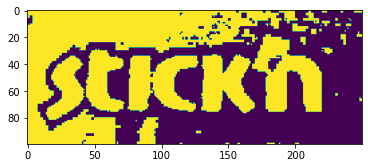

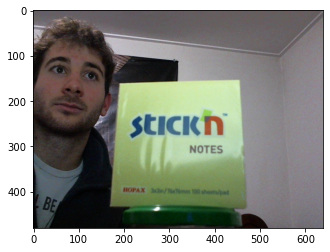

In [46]:
# Puntero al video
cap = cv.VideoCapture(0)

# Tomamos el primer frame del video (donde vamos a definir la ROI)
#-----------------------------------------------------------------
ret,frame = cap.read()

# Definimos la ubicación inical de la ventana de seguimiento
#-----------------------------------------------------------
# r,h,c,w - Región de la imagen (valores harcodeados)
x, y, w, h = 200, 200, 250, 100
track_window = (x, y, w, h)

# Una vez definida la ROI recortamos esa parte de la imagen que utilizaremos para seguimiento
#--------------------------------------------------------------------------------------------
roi = frame[y:y+h, x:x+w]
# Pasamos la ROI a HSV (los valores de H son más estables a cambios de intensidad)
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
# Definimos una máscara para el histograma (Hue: 0..180, Saturation:60..255, Value:32..255)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
# Y calculamos el histograma sobre esa máscara (toma solo el Hue: tonalidad)
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
# Normalizamos el histograma (entre 0 y 255 según indica el flag cv.NORM_MINMAX)
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)

# Mostramos lo que se fue armando en relación a la ROI
#-----------------------------------------------------
plt.figure()
plt.imshow(mask)

# Muestro la imagen como para ver dónde definimos la ROI
#-------------------------------------------------------
plt.figure()

plt.imshow(cv.cvtColor(frame,cv.COLOR_BGR2RGB))

In [47]:
# Condición de terminación: 10 iteraciones o moverse al menos 1pt
#----------------------------------------------------------------
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 1, 10 )

while(1):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # Selección del ROI
        #----------------------------------
        flags = 1
        param = 1
#         selectROI(cv.EVENT_LBUTTONDOWN,x,y,flags,param)
        
        # Aplicamos camshift al nuevo frame
        #----------------------------------
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        
        # Dibujamos la ventana sobre la imagen
        #=====================================
        
        # Con escalamiento y rotación de la ventana de seguimiento
        #---------------------------------------------------------
        #pts = cv.boxPoints(ret)                      # Encuentra los 4 vértices del rectángulo rotado
        #pts = np.int0(pts)                           # int0 (entero usado para indexado)
        #img2 = cv.polylines(frame,[pts],True, 255,2) # Dibujo del rectángulo
        
        # Con escalamiento de ventana - Sin rotación
        #-------------------------------------------
        x,y,w,h = track_window
        img2 = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        
        cv.imshow('Seguimiento',img2)
        
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
cv.destroyAllWindows()
cap.release()